In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LogNorm
import seaborn as sns
from scipy.optimize import curve_fit
from scipy import stats
from scipy.special import erf
import scipy

Importing The Data for Sodium-22

In [2]:
data = pd.read_csv("DataR_CH3@V1730_221_run101_1.csv")
df1=data["BOARD;CHANNEL;TIMETAG;ENERGY;ENERGYSHORT;FLAGS"].str.split(";", expand=True)
df1=df1.rename(columns={
    0 : "Board",
    1 : "Channel",
    2 : "TimeTag",
    3 : "Energy",
    4 : "EnergyShort",
    5 : "Flags"
})
df1.to_csv("refined_data_101.csv")
df1

,Board,Channel,TimeTag,Energy,EnergyShort,Flags
0,0,3,11479049155,174,154,0x4000
1,0,3,17416730811,120,107,0x4000
2,0,3,22819646225,684,632,0x4000
3,0,3,34402400928,2664,2477,0x4000
4,0,3,55269485484,188,167,0x4000
...,...,...,...,...,...,...
235740,0,3,992510724291389,1325,1237,0x4000
235741,0,3,992510962041186,983,919,0x4000
235742,0,3,992512550164412,447,412,0x4000
235743,0,3,992513977688233,277,257,0x4000


In [3]:
df2 = pd.read_csv("refined_data_101.csv")

cloumn = "Energy"
select_column = df2[cloumn]
select_column_energy = select_column.tolist()
type(select_column_energy)




colum2 = "EnergyShort"
select_column2 = df2[colum2]
select_column_short = select_column2.tolist()

cloum3 = "TimeTag"
select_column3 = df2[cloum3]
select_column_timetag = select_column3.tolist()

In [4]:
long_gate = np.array(select_column_energy)
short_gate = np.array(select_column_short)
time_tag_array = np.array(select_column_timetag)

In [5]:
QsbyQl = np.divide(short_gate , long_gate)
psd = 1-QsbyQl
psd_list = psd.tolist()

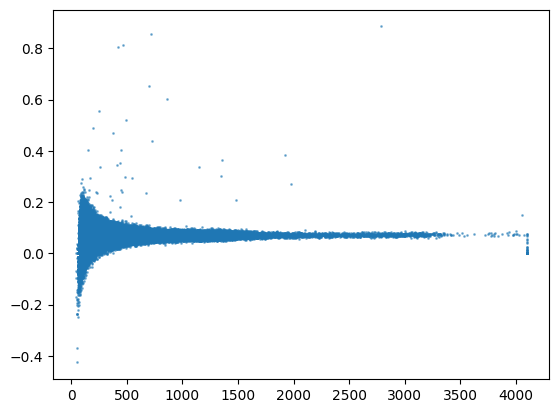

In [6]:
plt.scatter( long_gate , psd , alpha=0.5, s=1)

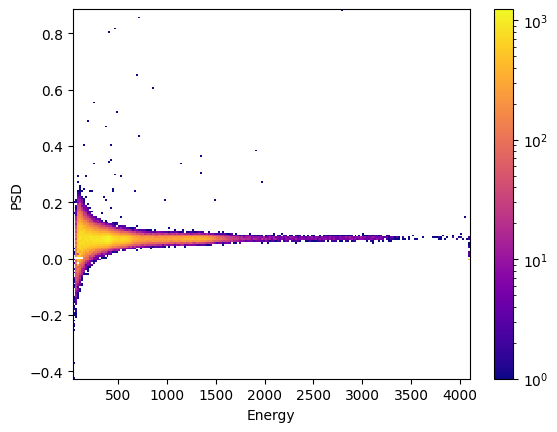

In [7]:
h, xedge, yedge, img = plt.hist2d(long_gate, psd, bins=(200,200), cmap='plasma', norm=LogNorm())
# plt.xlabel("ADC Channel")
plt.colorbar()
plt.xlabel("Energy")
plt.ylabel("PSD")
plt.savefig("Heat_plot.png")

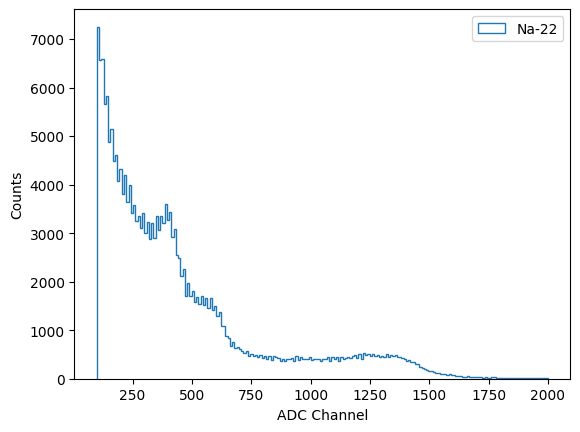

In [8]:
counts , edges , plot = plt.hist( long_gate , bins = 200, range=(100,2000) , histtype='step'  , label = "Na-22" , density = False )
plt.legend()
plt.xlabel("ADC Channel")
plt.ylabel("Counts")
plt.savefig("ADC spectrum of Na-22.png")

In [9]:
# edges

In [10]:
# y = ( 0.000715842077072048 )x + ( 0.18069086932635492 )

In [11]:
long_gate2 = (0.0007032008642733409)*(long_gate) + (0.02537153831758976)
len(long_gate2)

235745

In [12]:
(0.0007032008642733409)*(636.3738925) + (0.02537153831758976)

0.4728702095245799

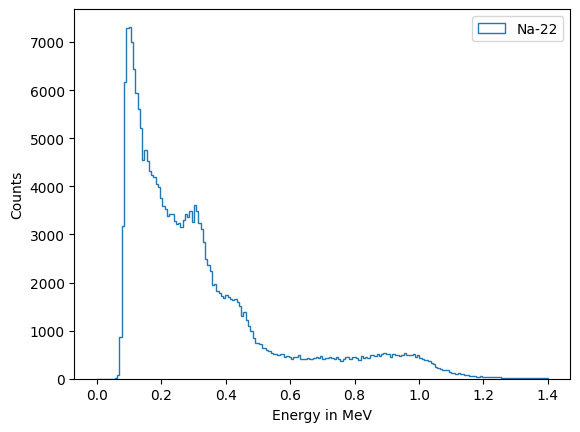

In [13]:
counts2 , edges2 , plot = plt.hist( long_gate2 , bins = 200, histtype='step'  , range = (0 , 1.4) , label = "Na-22" , density = False )
plt.legend()
plt.xlabel("Energy in MeV")
plt.ylabel("Counts")
plt.savefig("Energy spectrum of Na-22.png")
# edges

In [14]:
statistic, bin_edges, bin_number = stats.binned_statistic(long_gate , long_gate , range=(100,2000) ,statistic='std', bins= 200)

In [15]:
# edges

In [16]:
# bin_edges


In [17]:
for i in range( 0 , len(bin_edges)):
    if bin_edges[i] == 451.5:
        print(i)
print(len(statistic))

37
200


In [18]:
print(statistic[37])

2.563900403065928


In [19]:
len(statistic)
# print(statistic[145])

200

In [20]:
len(edges)

201

In [21]:
edges
for i in range(0 , len(edges)):
    if edges[i] == 1477.5:
        print(i)

145


In [22]:
print(counts)
print(counts[145])

[7254. 6560. 6593. 5659. 5830. 4877. 5150. 4478. 4619. 4075. 4319. 3810.
 4192. 3635. 3991. 3405. 3586. 3246. 3349. 3096. 3416. 3013. 3237. 2874.
 3214. 2902. 3348. 3055. 3358. 3206. 3595. 3269. 3429. 2917. 3076. 2554.
 2484. 2115. 2265. 1715. 1975. 1697. 1818. 1588. 1688. 1541. 1705. 1520.
 1662. 1452. 1661. 1416. 1496. 1284. 1375. 1078. 1085.  889.  846.  670.
  758.  635.  647.  608.  581.  531.  563.  459.  510.  460.  497.  457.
  482.  420.  460.  415.  458.  390.  478.  446.  418.  368.  415.  369.
  415.  402.  420.  372.  474.  384.  444.  407.  399.  408.  442.  387.
  407.  407.  408.  371.  413.  401.  450.  364.  442.  398.  451.  364.
  450.  411.  427.  439.  423.  466.  491.  434.  511.  416.  524.  484.
  502.  470.  509.  474.  486.  447.  471.  443.  514.  455.  488.  469.
  497.  440.  451.  437.  403.  365.  393.  340.  346.  294.  295.  233.
  219.  199.  178.  167.  169.  131.  120.  108.  105.  104.  105.   81.
   88.   68.   75.   53.   60.   60.   43.   33.   

In [23]:
len((edges[1:] + edges[:-1])/2)

200

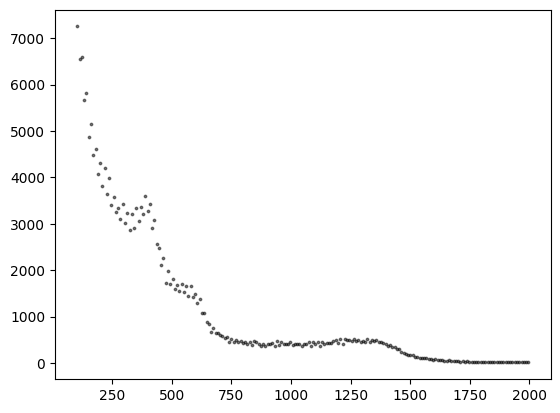

In [24]:
plt.clf()
plt.scatter((edges[1:] + edges[:-1])/2, counts , color = 'black' , alpha=0.5, s=3)

In [25]:
len((edges[1:] + edges[:-1])/2) == len(statistic)

True

In [26]:
x_data = ((edges[1:] + edges[:-1])/2).tolist()
y_data = (counts).tolist()
x_data_r = []
y_data_r = []
for i in range(0 , len(x_data)):
    if x_data[i] >= 307:
        x_data_r.append(x_data[i])
        y_data_r.append(y_data[i])
x_data_r = np.array(x_data_r)
y_data_r = np.array(y_data_r)

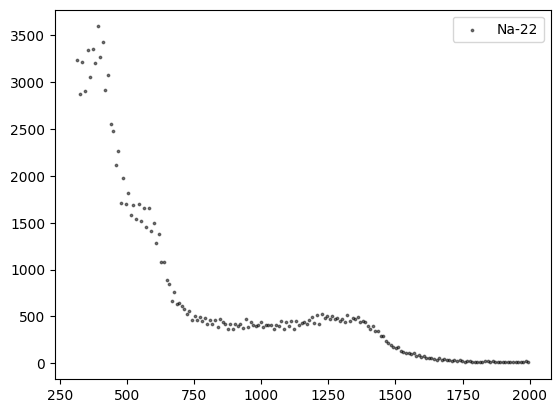

In [27]:
plt.scatter(x_data_r , y_data_r , color = 'black' , alpha=0.5, s=3 , label = "Na-22")
plt.legend()
plt.savefig("counts_vs_ADC.png")

In [28]:
print(max(y_data_r))

3595.0


In [29]:
for i in range(0, len( x_data_r )):
    if y_data_r[i] == 7217:
        print(x_data_r[i])

In [30]:
# so the 1st compton edge is at 395.725 ADC  E = 511 keV

In [31]:
x_data_r_1 = []
y_data_r_1 = []

for i in range(0 , len(x_data)):
    if x_data[i] >= 1000:
        x_data_r_1.append(x_data[i])
        y_data_r_1.append(y_data[i])
x_data_r_1 = np.array(x_data_r_1)
y_data_r_1 = np.array(y_data_r_1)

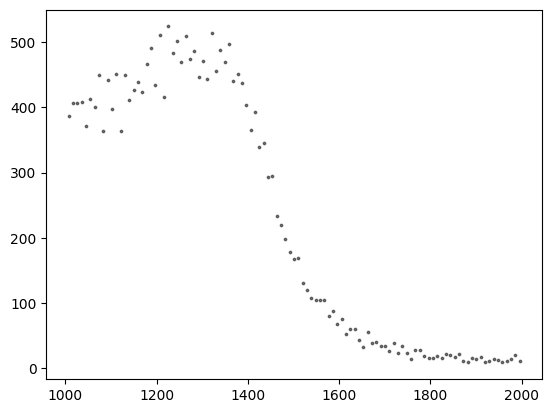

In [32]:
plt.scatter( x_data_r_1 , y_data_r_1 , color = 'black' , alpha=0.5, s=3)

In [33]:
print(max(y_data_r_1))

524.0


In [34]:
for i in range(0, len( x_data_r_1 )):
    if y_data_r_1[i] == 1080:
        print(x_data_r_1[i])

In [35]:
# so the 2nd compton edge is at 1247.065 ADC  E = 1200 KeV

In [36]:
# y = ( 0.0008915654300646849 )x + (0.16393663452406193)

In [37]:
energy_array = np.add((np.multiply(  x_data_r , 0.0008915654300646849)) , 0.16393663452406193)

In [38]:
# plt.plot( energy_array , y_data_r , color = 'black', label = "Na-22")
# plt.xlabel("Energy in MeV")
# plt.ylabel("Counts")
# plt.legend()
# plt.savefig("Energy Spectrum of Sodium-22.png")

In [39]:
# plt.scatter( energy_array , y_data_r , color = 'black', label = "Na-22" , alpha = 0.5 , s =3 )

In [40]:
# print(max(y_data_r))

In [41]:
for i in range( 0 , len(y_data_r)):
    if y_data_r[i] == 7217:
        print( energy_array[i] )

In [42]:
x_data_r_2 = []
y_data_r_2 = []

for i in range(0 , len(energy_array)):
    if energy_array[i] >= 1 :
        x_data_r_2.append(energy_array[i])
        y_data_r_2.append(y_data_r[i])
x_data_r_2 = np.array(x_data_r_2)
y_data_r_2 = np.array(y_data_r_2)

In [43]:
# plt.scatter( x_data_r_2 , y_data_r_2)

In [44]:
print(max(y_data_r_2))

524.0


In [45]:
for i in range( 0 , len(y_data_r_2)):
    if y_data_r_2[i] == 1080:
        print(x_data_r_2[i])

In [46]:
x_data_r_3 = []
y_data_r_3 = []

for i in range(0 , len(x_data)):
    if (x_data[i] >= 1100) and (x_data[i] <= 2000): # 1100
        x_data_r_3.append(x_data[i])
        y_data_r_3.append(y_data[i])
x_data_r_3 = np.array(x_data_r_3)
y_data_r_3 = np.array(y_data_r_3)

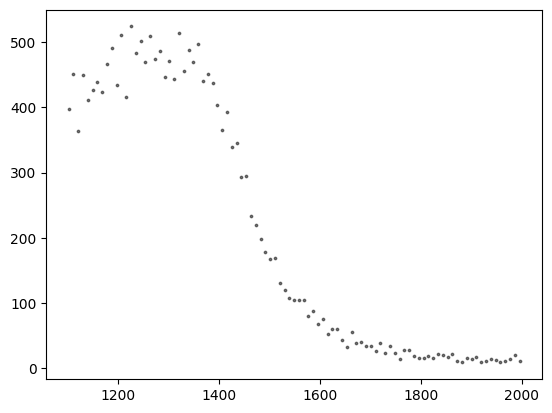

In [47]:
plt.scatter( x_data_r_3 , y_data_r_3 , color = 'black' , alpha=0.5, s=3)

In [48]:
# x_data_r_3

In [49]:
# y_data_r_3

In [50]:
# def erf_model(x, a, c, d,sigma):
#     return 1- (a * erf((x + c)/(np.sqrt(2)*sigma)) + d)

In [51]:
def erf_model2(x, a, c, d,sigma):
    return (a * (1-erf((x + c)/(np.sqrt(2)*sigma))) + d)

In [52]:
x_data_r_4 = []
y_data_r_4 = []

for i in range(0 , len(x_data)):
    if (x_data[i] >= 485) and (x_data[i] <= 1000): # 1100
        x_data_r_4.append(x_data[i])
        y_data_r_4.append(y_data[i])
x_data_r_4 = np.array(x_data_r_4)
y_data_r_4 = np.array(y_data_r_4)

In [53]:
x_data_r_4

array([494.25, 503.75, 513.25, 522.75, 532.25, 541.75, 551.25, 560.75,
       570.25, 579.75, 589.25, 598.75, 608.25, 617.75, 627.25, 636.75,
       646.25, 655.75, 665.25, 674.75, 684.25, 693.75, 703.25, 712.75,
       722.25, 731.75, 741.25, 750.75, 760.25, 769.75, 779.25, 788.75,
       798.25, 807.75, 817.25, 826.75, 836.25, 845.75, 855.25, 864.75,
       874.25, 883.75, 893.25, 902.75, 912.25, 921.75, 931.25, 940.75,
       950.25, 959.75, 969.25, 978.75, 988.25, 997.75])

In [54]:
for i in range ( 0 , len(bin_edges)):
    if (bin_edges[i] + bin_edges[i+1])/2 == 494.25:
        print(i)
        print(bin_edges[i])
        break
for i in range ( 0 , len(bin_edges)):
    if (bin_edges[i] + bin_edges[i+1])/2 == 997.75:
        print(i+1)
        print(bin_edges[i+1])
        break

41
489.5
95
1002.5


In [55]:
# statistic

In [56]:
y_error_edge_1 = []
for i in range ( 0 , len(statistic)):
    if (i > 41) and (i<= 95):
        y_error_edge_1.append(statistic[i])

In [57]:
len(y_error_edge_1) == len(x_data_r_4)
y_error_edge_1  = np.array(y_error_edge_1 )

In [58]:
bin_edges

array([ 100. ,  109.5,  119. ,  128.5,  138. ,  147.5,  157. ,  166.5,
        176. ,  185.5,  195. ,  204.5,  214. ,  223.5,  233. ,  242.5,
        252. ,  261.5,  271. ,  280.5,  290. ,  299.5,  309. ,  318.5,
        328. ,  337.5,  347. ,  356.5,  366. ,  375.5,  385. ,  394.5,
        404. ,  413.5,  423. ,  432.5,  442. ,  451.5,  461. ,  470.5,
        480. ,  489.5,  499. ,  508.5,  518. ,  527.5,  537. ,  546.5,
        556. ,  565.5,  575. ,  584.5,  594. ,  603.5,  613. ,  622.5,
        632. ,  641.5,  651. ,  660.5,  670. ,  679.5,  689. ,  698.5,
        708. ,  717.5,  727. ,  736.5,  746. ,  755.5,  765. ,  774.5,
        784. ,  793.5,  803. ,  812.5,  822. ,  831.5,  841. ,  850.5,
        860. ,  869.5,  879. ,  888.5,  898. ,  907.5,  917. ,  926.5,
        936. ,  945.5,  955. ,  964.5,  974. ,  983.5,  993. , 1002.5,
       1012. , 1021.5, 1031. , 1040.5, 1050. , 1059.5, 1069. , 1078.5,
       1088. , 1097.5, 1107. , 1116.5, 1126. , 1135.5, 1145. , 1154.5,
      

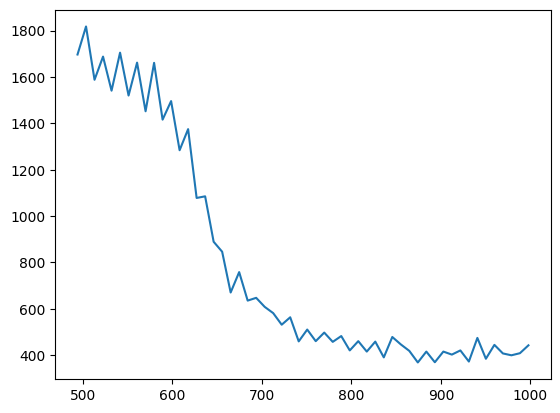

In [59]:
plt.plot( x_data_r_4 , y_data_r_4)

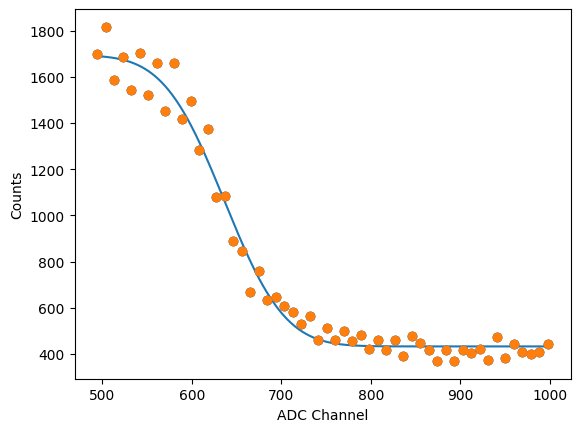

In [60]:
m , dm = scipy.optimize.curve_fit(erf_model2 , x_data_r_4 , y_data_r_4 , p0=[1200, -600,400,20]  )
plt.scatter( x_data_r_4 , y_data_r_4 , color = 'black' )
x_fit = np.linspace(min(x_data_r_4), max(x_data_r_4), 500)
plt.plot( x_fit , erf_model2(x_fit, *m) )
plt.xlabel("ADC Channel")
plt.ylabel("Counts")
y_errors  = y_error_edge_1
plt.errorbar( x_data_r_4 , y_data_r_4,   yerr = y_errors, fmt='o')
plt.savefig("fitted curve for the unusual edge.png")

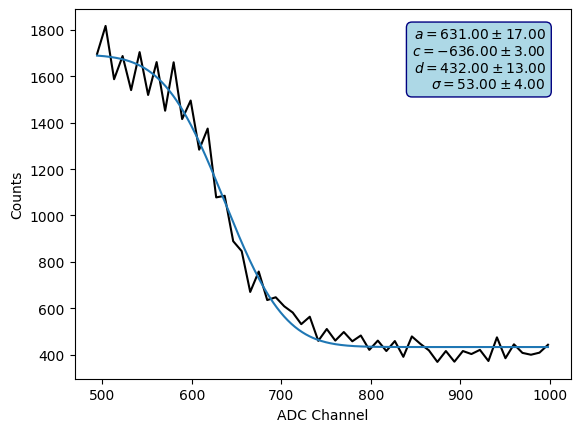

In [61]:
m , dm = scipy.optimize.curve_fit(erf_model2 , x_data_r_4 , y_data_r_4 , p0=[1200, -600,400,20]  )
plt.plot( x_data_r_4 , y_data_r_4 , color = 'black' )
x_fit = np.linspace(min(x_data_r_4), max(x_data_r_4), 500)
plt.plot( x_fit , erf_model2(x_fit, *m))
plt.xlabel("ADC Channel")
plt.ylabel("Counts")
# plt.legend()
param_text = (
    fr'$a = {631:.2f} \pm {17:.2f}$' + '\n' +
    fr'$c = {-636:.2f} \pm {3:.2f}$' + '\n' +
    fr'$d = { 432:.2f} \pm {13:.2f}$' + '\n' +
    fr'$\sigma = {53 :.2f} \pm {4:.2f}$'
)

plt.text(0.95, 0.95, param_text, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.4', facecolor='lightblue', edgecolor='navy'))
plt.savefig("fitted curve for the unusual edge.png")

In [62]:
m

array([ 631.18488502, -636.3738925 ,  432.22768109,   53.11387625])

In [63]:
print( ( 0.000715842077072048 )*(636.3738925) + ( 0.18069086932635492 ) )

0.6362340783279792


In [64]:
dm

array([[ 299.94768781,   29.58060257, -100.26593781,   49.23942435],
       [  29.58060257,   10.31956231,    8.27689272,    4.8110227 ],
       [-100.26593781,    8.27689272,  155.64731278,  -16.7699416 ],
       [  49.23942435,    4.8110227 ,  -16.7699416 ,   17.49187142]])

In [65]:
print(np.sqrt(np.diag(dm)))

[17.31899789  3.21240756 12.47586922  4.18232847]


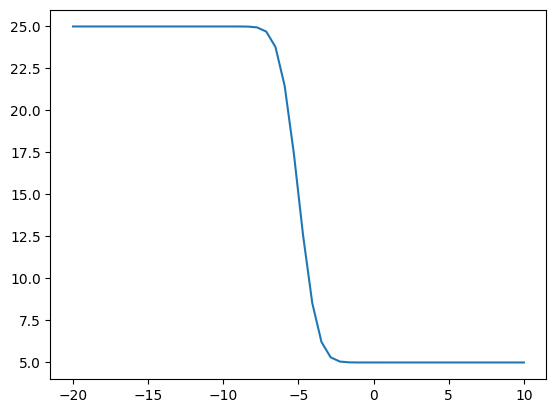

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

x = np.linspace(-20,10)
a = 10
b = 5
c = 1
d=10
plt.plot(x, a*(1- erf((x+b)/1.4))+5)

In [67]:
def loss1(a, c, d, X_data, Y_data, Y_err_data):
    j = (Y_data - erf_model(X_data, a, c, d))/(Y_err_data)
    loss_val = j*j
    return loss_val

In [68]:
def loss(a, c, d, X_data, Y_data, Y_err_data):
    j = (Y_data - erf_model(X_data, a, c, d))/(Y_err_data)
    loss_val = j@j
    return loss_val

In [69]:
# a = (np.linspace( 397.5 , 557.5 , 450)).tolist()
# c = (np.linspace( -1600 , -1200 , 450)).tolist()
# d = (np.linspace( -551.5 , -401.5 , 450)).tolist()
# y_err = np.ones(450)
# x_data_r_3l = x_data_r_3.tolist()
# y_data_r_3l = y_data_r_3.tolist()
# len(y_data_r_3l)
# len(x_data_r_3l)
# len(y_err)
# type(a)

In [70]:
# l = 0
# p = 81
# loss_list =[]
# for j in range( 0 , len(a)):
#     for i in range( 0 , len(y_data_r_3)):
#         l =  l + loss1( a[j] , c[j] , d[j] , x_data_r_3l[i] , y_data_r_3l[i] , 1)
#     loss_list.append(l)
#     l = 0
# loss_list
# # print(len(loss_list))
# print(min(loss_list))

In [71]:
# for i in range ( 0 , len(a)):
#     if loss_list[i] == 560729.7663056883:
#         print(i)

In [72]:
# print(a[146])
# print(c[146])
# print(d[146])

In [73]:
# a1 = np.linspace( 397.5 , 557.5 , 450)
# d1 = np.linspace( -551.5 , -401.5 , 450)
# c1 =  np.ones(450)*(-1469.95985632)

In [74]:
# initial_guess = [449.52672605790644 , -1469.9331848552338 , -502.72494432071267 , 11.98 ]
# initial_guess =  [1.0, 1500, 0.1, 100]

# m , dm = scipy.optimize.curve_fit(erf_model , x_data_r_3 , y_data_r_3,  bounds = ([200 , -1600 , -249 , 1] , [250 , -1200 , -199 , 500])  )
# plt.plot( x_data_r_3 , y_data_r_3 , color = 'black' )
# # [400 , -1600 , -549 , 100] , [550 , -1200 , -395 , 500]
# x_fit = np.linspace(min(x_data_r_3), max(x_data_r_3), 500)
# plt.plot( x_fit , erf_model(x_fit, *m) )
# plt.savefig("fitted curve for Na-22 second edge.png")

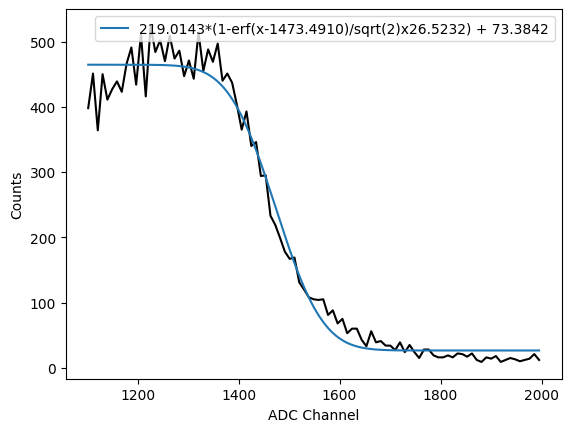

In [75]:
# initial_guess = [449.52672605790644 , -1469.9331848552338 , -502.72494432071267 , 11.98 ]
# initial_guess =  [1.0, 1500, 0.1, 100]

m , dm = scipy.optimize.curve_fit(erf_model2 , x_data_r_3 , y_data_r_3, p0=[200, -1400,0,20]  )
plt.plot( x_data_r_3 , y_data_r_3 , color = 'black' )
# [400 , -1600 , -549 , 100] , [550 , -1200 , -395 , 500]
x_fit = np.linspace(min(x_data_r_3), max(x_data_r_3), 500)
plt.plot( x_fit , erf_model2(x_fit, *m) , label = "219.0143*(1-erf(x-1473.4910)/sqrt(2)x26.5232) + 73.3842")
plt.xlabel("ADC Channel")
plt.ylabel("Counts")
plt.legend()
# plt.savefig("fitted curve for Na-22 second edge.png")

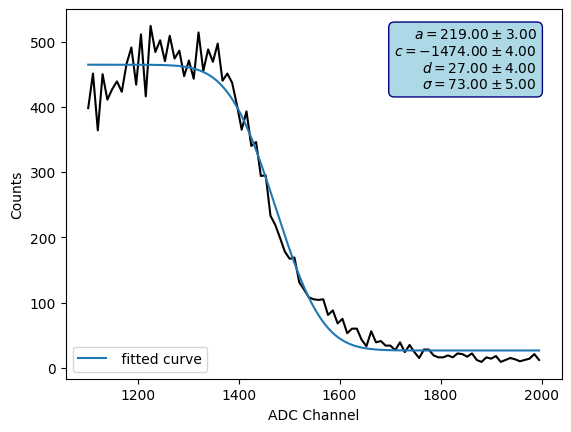

In [76]:
m , dm = scipy.optimize.curve_fit(erf_model2 , x_data_r_3 , y_data_r_3, p0=[200, -1400,0,20]  )
plt.plot( x_data_r_3 , y_data_r_3 , color = 'black' )
# [400 , -1600 , -549 , 100] , [550 , -1200 , -395 , 500]
x_fit = np.linspace(min(x_data_r_3), max(x_data_r_3), 500)
plt.plot( x_fit , erf_model2(x_fit, *m) , label = " fitted curve")
plt.xlabel("ADC Channel")
plt.ylabel("Counts")
# Text box with parameters
param_text = (
    fr'$a = {219:.2f} \pm {3:.2f}$' + '\n' +
    fr'$c = {-1474:.2f} \pm {4:.2f}$' + '\n' +
    fr'$d = {27:.2f} \pm {4:.2f}$' + '\n' +
    fr'$\sigma = {73 :.2f} \pm {5:.2f}$'
)

plt.text(0.95, 0.95, param_text, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.4', facecolor='lightblue', edgecolor='navy'))
plt.legend()
plt.savefig("fitted curve for Na-22 second edge.png")

In [77]:
min(x_data_r_3)

np.float64(1102.25)

In [78]:
dm

array([[12.39649656,  1.72519912, -9.49160043,  8.30734476],
       [ 1.72519912, 12.8974218 ,  4.82232729,  1.15611142],
       [-9.49160043,  4.82232729, 17.61144454, -6.36067819],
       [ 8.30734476,  1.15611142, -6.36067819, 23.58482635]])

In [79]:
m

array([  219.01434468, -1473.49098918,    26.52316779,    73.38418435])

In [80]:
np.sqrt(np.diag(dm))

array([3.52086588, 3.59129807, 4.19659916, 4.85642115])

In [81]:
# residuals = y_data_r_3 - erf_model(x_data_r_3 , *m)
# plt.ylim(-200 , 200)
# plt.plot( x_data_r_3 , residuals )
# plt.title("residual plot for second edge of Na")

In [82]:
perr = np.sqrt(np.diag(dm))
print(perr)

[3.52086588 3.59129807 4.19659916 4.85642115]


In [83]:
x1 = np.linspace( 1200 , 1800, 10000)

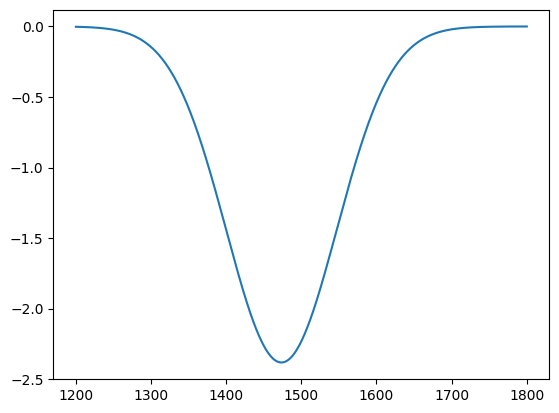

In [84]:
y_prime = np.gradient(erf_model2( x1 , *m), x1)
plt.plot( x1 , y_prime)

In [85]:
# y1 = 1 - ( 219.01492157*(erf(x-(-1473.49149108))/(np.sqrt(2)*(-244.53736508))) + 73.38599442)

In [86]:
# so the second edge is at 1473.49098918 ADC

In [87]:
# x1 = np.linspace( 1000 , 2000 ,100000)
# y1 = erf_model( x1 , 219.01492157, -1473.49149108,  -244.53736508,    73.38599442)
# plt.plot( x1 , y1)

In [88]:
# y1_prime = np.gradient(erf_model( x1 , *m),x1)
# # plt.plot( x1 , y1_prime)
# y1_prime
# plt.plot(x1 , y1_prime) 

In [89]:
# min(y1_prime)    

In [90]:
# for i in range( 0 , len(y1_prime)):
#     if y1_prime[i] == -2.3812258071684482:
#         print(x1[i])

In [91]:
#  so the second peak is at 1473.4947349473496

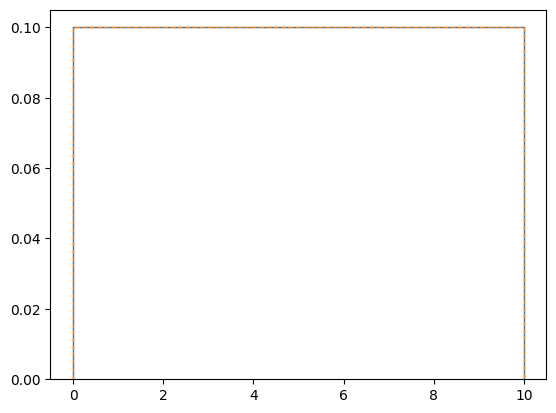

In [95]:
x= np.linspace(0,10,1000)
y= np.linspace(0,10,100)

plt.hist(x,bins=100,histtype='step',density=True)
plt.hist(y,bins=100,histtype='step',density=True,linestyle='--')
plt.show()

In [96]:
# m

In [97]:
# y_prime = np.gradient(erf_model( x_ar , *m),x_ar)
# # plt.plot( x_ar , y_prime)

In [98]:
# print(len(y_prime))

In [99]:
# print(len(x_ar))

In [100]:
x_data_4 = []
y_data_4 = []


for i in range( 0 , len(x_data)):
    if  (x_data[i] >= 250) and (x_data[i] <= 550):
        x_data_4.append(x_data[i] )
        y_data_4.append(y_data[i] )

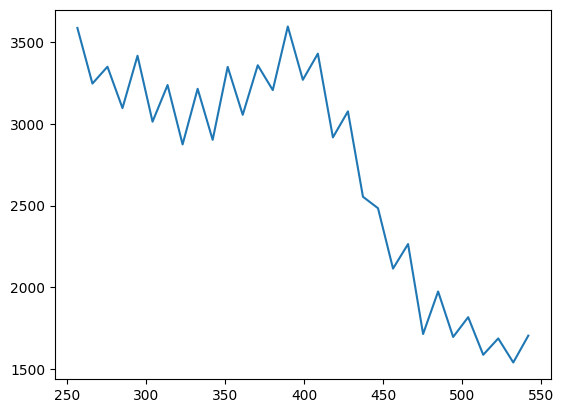

In [101]:
plt.plot( x_data_4 , y_data_4 )

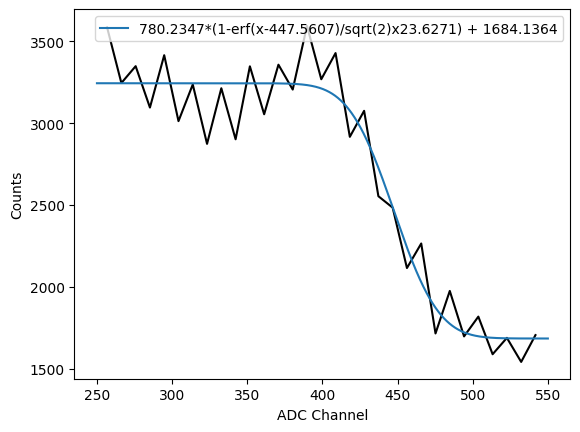

In [102]:
m2 , dm2 = scipy.optimize.curve_fit( (erf_model2) , x_data_4 , y_data_4 , p0=[1000, -450,1500,20] )
plt.plot( x_data_4 , y_data_4 , color = 'black'  ) 

x_fit2 = np.linspace(250, 550, 5000)
plt.plot( x_fit2 , erf_model2(x_fit2, *m2) , label = "780.2347*(1-erf(x-447.5607)/sqrt(2)x23.6271) + 1684.1364")
plt.xlabel("ADC Channel")
plt.ylabel("Counts")
plt.legend()
# plt.savefig("fitted curve for Na-22 first edge.png")

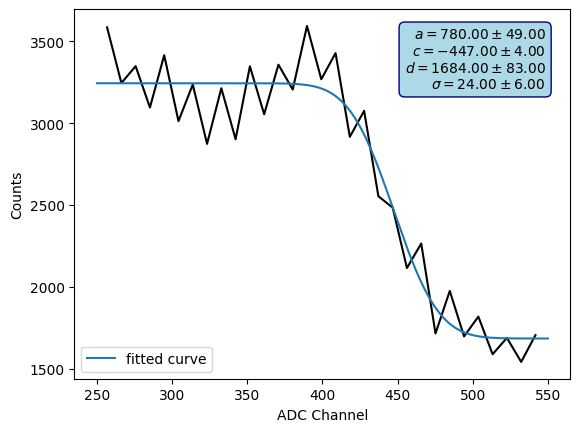

In [103]:
m2 , dm2 = scipy.optimize.curve_fit( (erf_model2) , x_data_4 , y_data_4 , p0=[1000, -450,1500,20] )
plt.plot( x_data_4 , y_data_4 , color = 'black'  ) 

x_fit2 = np.linspace(250, 550, 5000)
plt.plot( x_fit2 , erf_model2(x_fit2, *m2) , label = "fitted curve")
plt.xlabel("ADC Channel")
plt.ylabel("Counts")
param_text = (
    fr'$a = {780:.2f} \pm {49:.2f}$' + '\n' +
    fr'$c = {-447:.2f} \pm {4:.2f}$' + '\n' +
    fr'$d = {1684:.2f} \pm {83:.2f}$' + '\n' +
    fr'$\sigma = {24 :.2f} \pm {6:.2f}$'
)

plt.text(0.95, 0.95, param_text, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.4', facecolor='lightblue', edgecolor='navy'))
plt.legend()
plt.savefig("fitted curve for Na-22 first edge.png")

In [104]:
m2 # The value of the parameters  a , c ,d and sigma respectively

array([ 780.23470846, -447.56066337, 1684.13638139,   23.62711228])

In [105]:
dm2 # The covarience Matrix

array([[ 2.47936141e+03, -6.10000866e+01, -3.61598768e+03,
         1.50128304e+02],
       [-6.10000866e+01,  1.86103994e+01,  1.79621655e+02,
        -3.69309056e+00],
       [-3.61598768e+03,  1.79621655e+02,  6.96286646e+03,
        -2.18942332e+02],
       [ 1.50128304e+02, -3.69309056e+00, -2.18942332e+02,
         3.35786981e+01]])

In [106]:
np.sqrt(np.diag(dm2)) # The standered deviation of the respective parameters

array([49.79318636,  4.31397722, 83.44379223,  5.79471294])

In [107]:
df3 = pd.read_csv("refined_data_102.csv")

In [108]:
cloumn = "Energy"
select_column4 = df3[cloumn]
select_column_energy3 = select_column4.tolist()
type(select_column_energy3)
len(select_column_energy3)

91786

Combined plot for ADC spectrum of Sodium and Cesium

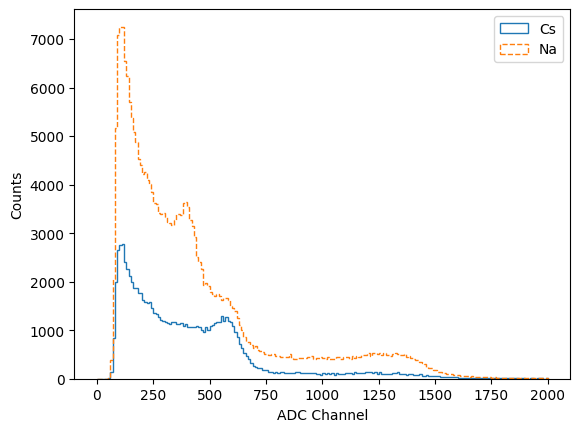

In [109]:
select_column_energy3 = np.array(select_column_energy3)
counts_cs , edges_cs , plot = plt.hist( select_column_energy3 , bins = 200, histtype='step' , range=(0,2000)  , label = "Cs" )
counts , edges , plot = plt.hist( long_gate , bins = 200, histtype='step' , range=(0,2000)   , linestyle='--' , label = "Na")
plt.legend()
plt.xlabel("ADC Channel")
plt.ylabel("Counts")
plt.savefig("Comparision.png")

In [110]:
len(long_gate)

235745

In [111]:
(2*((0.662)**2))/((0.511) + 2*((0.662)))

0.47765013623978203

In [112]:
(2*((1.2745)**2))/((0.511) + 2*((1.2745)))

1.0616668300653596

In [113]:
(2*((0.511)**2))/((0.511) + 2*((0.511)))

0.3406666666666667